<a href="https://colab.research.google.com/github/Shahbaz894/agenticAi/blob/main/BabyCryEdgeAIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras xgboost


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv("/content/sample_data/donateacry-corpus_features_final.csv")  # Replace with your dataset path

In [5]:
df.head()

,Cry_Audio_File,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437


In [6]:
df.drop(columns=["Cry_Audio_File"], inplace=True)

In [7]:


# Split dataset into features (X) and target (y)
X = df.drop(columns=["Cry_Reason"])  # Replace "target" with your actual target column name
y = df["Cry_Reason"]

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save preprocessed data (Optional)
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

print("✅ Data Preprocessing Complete!")


✅ Data Preprocessing Complete!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:04:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

               Accuracy  Precision    Recall  F1 Score   ROC-AUC
Random Forest  0.815217   0.697464  0.815217  0.751757  0.517106
SVM            0.836957   0.700496  0.836957  0.762670  0.723170
XGBoost        0.826087   0.698997  0.826087  0.757246  0.656178


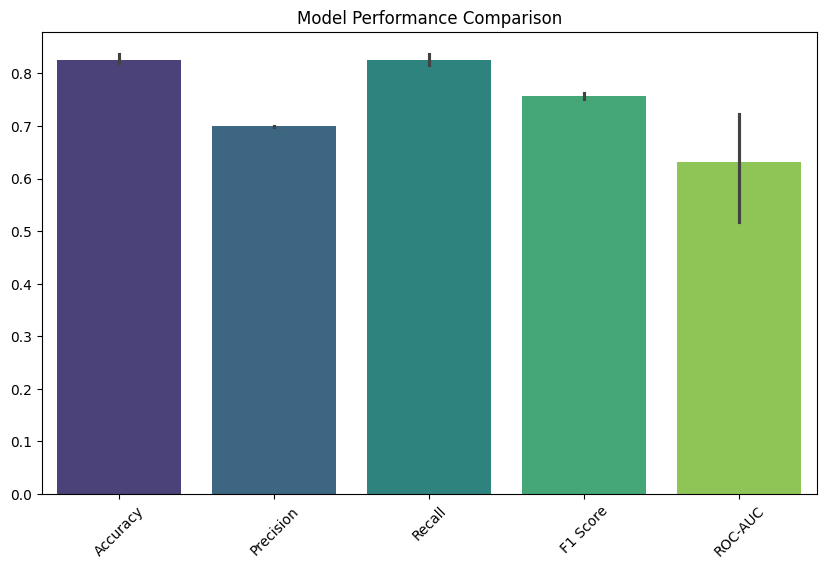

[I 2025-04-02 05:04:31,809] A new study created in memory with name: no-name-66417046-324f-4c19-8b26-4c2e9dbf2fb8
<ipython-input-8-83e6bd5d15cc>:67: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-8-83e6bd5d15cc>:68: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-8-83e6bd5d15cc>:69: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5,


Best XGBoost Parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.01020722821135646, 'subsample': 0.6129917598789703, 'colsample_bytree': 0.9631620011728259}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Optimized XGBoost Results:
                   Accuracy  Precision    Recall  F1 Score   ROC-AUC
Optimized XGBoost  0.826087   0.698997  0.826087  0.757246  0.425938

Final Model Comparison:
                   Accuracy  Precision    Recall  F1 Score   ROC-AUC
Random Forest      0.815217   0.697464  0.815217  0.751757  0.517106
SVM                0.836957   0.700496  0.836957  0.762670  0.723170
XGBoost            0.826087   0.698997  0.826087  0.757246  0.656178
Optimized XGBoost  0.826087   0.698997  0.826087  0.757246  0.425938


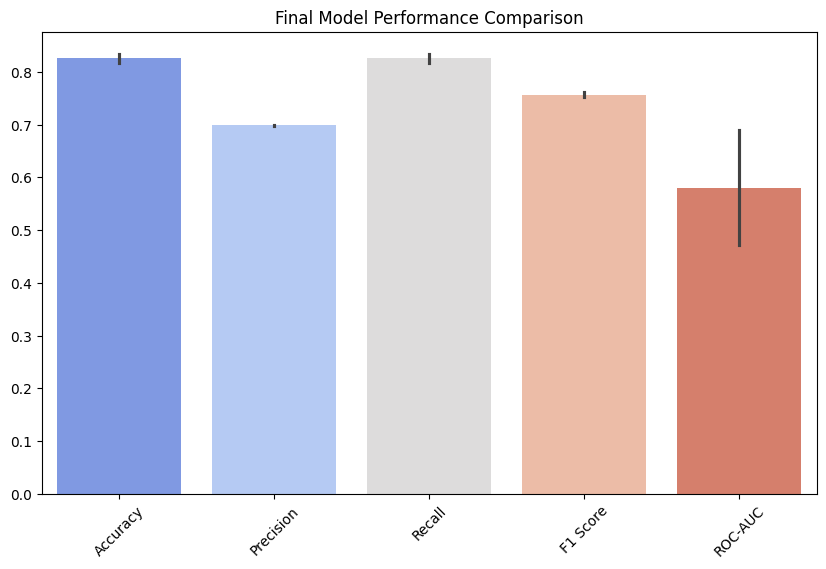

In [8]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load preprocessed data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# Define function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    return accuracy, precision, recall, f1, auc

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_results = evaluate_model(rf_model, X_test, y_test)

# Train SVM (with probability=True for AUC calculation)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_results = evaluate_model(svm_model, X_test, y_test)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_results = evaluate_model(xgb_model, X_test, y_test)

# Store results in a DataFrame
models = ["Random Forest", "SVM", "XGBoost"]
results = pd.DataFrame(
    [rf_results, svm_results, xgb_results],
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    index=models
)

# Print model results
print(results)

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results, palette="viridis")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

# Define function to optimize XGBoost using Optuna
def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))

    return accuracy

# Optimize XGBoost hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=20)

# Print best XGBoost hyperparameters
print("\nBest XGBoost Parameters:", study.best_params)

# Train XGBoost with best hyperparameters
best_xgb = xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train, y_train)
best_xgb_results = evaluate_model(best_xgb, X_test, y_test)

# Print updated XGBoost results
print("\nOptimized XGBoost Results:")
print(pd.DataFrame([best_xgb_results], columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"], index=["Optimized XGBoost"]))

# Compare all models including optimized XGBoost
results.loc["Optimized XGBoost"] = best_xgb_results
print("\nFinal Model Comparison:")
print(results)

# Plot updated performance with optimized XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=results, palette="coolwarm")
plt.title("Final Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install xgboost optuna imbalanced-learn shap lightgbm catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
[I 2025-04-02 05:06:16,847] A new study created in memory with name: no-name-dd7d5801-ebfa-4612-8604-69ed730cfe28
<ipython-input-9-f23a6f0148aa>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.3),
<ipy


Best XGBoost Parameters: {'n_estimators': 125, 'max_depth': 11, 'learning_rate': 0.004762601844092671, 'subsample': 0.8928030256140029, 'colsample_bytree': 0.5745914550535557, 'reg_lambda': 0.015795587100770503, 'reg_alpha': 0.0500300137242565}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 1525, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Model Comparison:
                   Accuracy  Precision    Recall  F1 Score   ROC-AUC
Optimized XGBoost  0.804348   0.803512  0.804348  0.802004  0.790898
LightGBM           0.739130   0.763866  0.739130  0.750666  0.736100
Random Forest      0.750000   0.784571  0.750000  0.764392  0.788135
SVM                0.630435   0.760211  0.630435  0.686180  0.675647


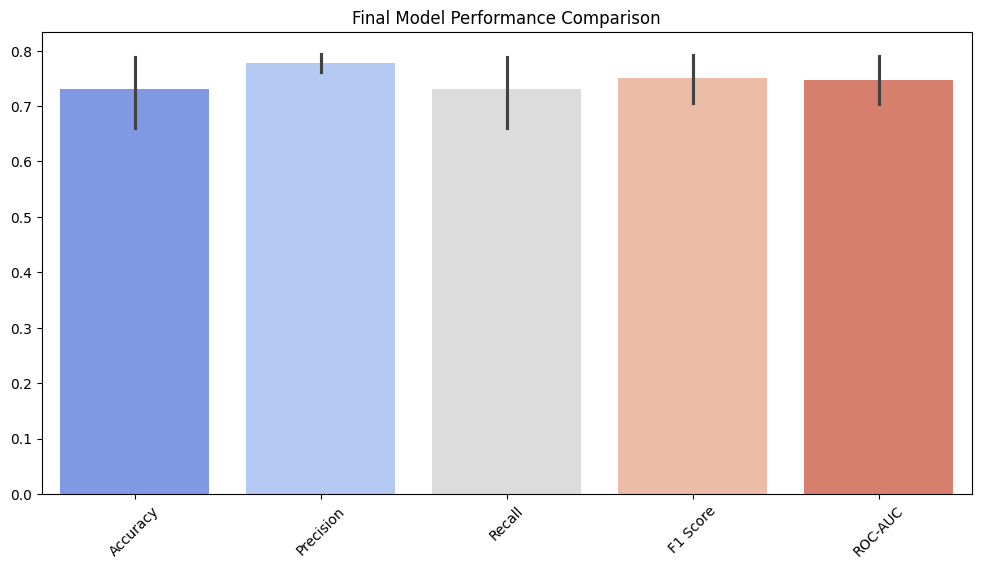

In [9]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Load data (preprocessed)
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# Apply SMOTE for class balancing (if imbalance exists)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Selection using XGBoost Feature Importance
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

# Select important features based on importance scores
selector = SelectFromModel(xgb_model, threshold="median", prefit=True)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Define function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    return accuracy, precision, recall, f1, auc

# Optimize XGBoost with Optuna
def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10)
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="mlogloss")
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))

    return accuracy

# Optimize hyperparameters with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=50)

# Best parameters
best_params = study.best_params
print("\nBest XGBoost Parameters:", best_params)

# Train optimized XGBoost
optimized_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric="mlogloss")
optimized_xgb.fit(X_train, y_train)
optimized_results = evaluate_model(optimized_xgb, X_test, y_test)

# Train LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=200)
lgb_model.fit(X_train, y_train)
lgb_results = evaluate_model(lgb_model, X_test, y_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_results = evaluate_model(rf_model, X_test, y_test)

# Train SVM
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_results = evaluate_model(svm_model, X_test, y_test)

# Store results in DataFrame
models = ["Optimized XGBoost", "LightGBM", "Random Forest", "SVM"]
results = pd.DataFrame(
    [optimized_results, lgb_results, rf_results, svm_results],
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    index=models
)

# Print final model results
print("\nFinal Model Comparison:")
print(results)

# Plot model performance
plt.figure(figsize=(12, 6))
sns.barplot(data=results, palette="coolwarm")
plt.title("Final Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# !pip install --upgrade --force-reinstall numpy scipy pandas scikit-learn xgboost


In [ ]:
# !pip install numpy==1.24.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.


[I 2025-04-02 05:43:34,457] A new study created in memory with name: no-name-577eb386-93d1-49c0-afaf-d323fe5c0052


SMOTE applied to balance the training data.
Detected 5 classes. Using softmax activation and categorical crossentropy loss.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


[I 2025-04-02 05:43:47,377] Trial 0 finished with value: 0.06521739130434782 and parameters: {'units': 36, 'dropout': 0.4385520976026065, 'optimizer': 'adam', 'batch_size': 61}. Best is trial 0 with value: 0.06521739130434782.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


[I 2025-04-02 05:44:02,038] Trial 1 finished with value: 0.41304347826086957 and parameters: {'units': 39, 'dropout': 0.3521656726077437, 'optimizer': 'rmsprop', 'batch_size': 99}. Best is trial 1 with value: 0.41304347826086957.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


[I 2025-04-02 05:44:14,842] Trial 2 finished with value: 0.15217391304347827 and parameters: {'units': 32, 'dropout': 0.2162203637946153, 'optimizer': 'rmsprop', 'batch_size': 94}. Best is trial 1 with value: 0.41304347826086957.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


[I 2025-04-02 05:44:44,643] Trial 3 finished with value: 0.2717391304347826 and parameters: {'units': 106, 'dropout': 0.4670983988156358, 'optimizer': 'adam', 'batch_size': 68}. Best is trial 1 with value: 0.41304347826086957.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step


[I 2025-04-02 05:45:03,892] Trial 4 finished with value: 0.06521739130434782 and parameters: {'units': 78, 'dropout': 0.38747614938194463, 'optimizer': 'rmsprop', 'batch_size': 97}. Best is trial 1 with value: 0.41304347826086957.



Best LSTM Parameters: {'units': 39, 'dropout': 0.3521656726077437, 'optimizer': 'rmsprop', 'batch_size': 99}
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2090 - loss: 1.6092
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2140 - loss: 1.6088
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2196 - loss: 1.6085
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2273 - loss: 1.6070
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2145 - loss: 1.6067
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2341 - loss: 1.6056
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2473 - loss: 1.6049
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2108 - loss: 1.6053
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2518 - loss: 1.6040
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2514 - loss: 1.6027
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2519 - loss: 1.6013
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2706 - l

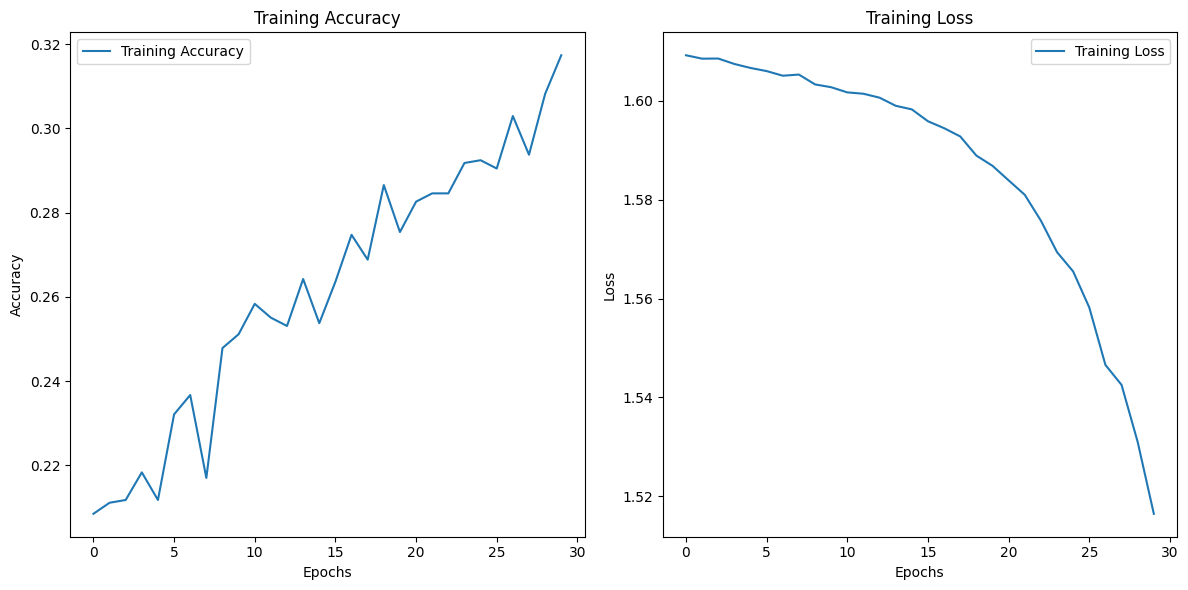

In [2]:
import pandas as pd
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load data (preprocessed)
try:
    X_train = pd.read_csv("X_train.csv").values
    X_test = pd.read_csv("X_test.csv").values
    y_train = pd.read_csv("y_train.csv").values.ravel()
    y_test = pd.read_csv("y_test.csv").values.ravel()
except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure the CSV files are in the correct directory.")
    exit()

# Apply SMOTE only if imbalance exists and there are at least two classes
unique_train_labels = np.unique(y_train)
if len(unique_train_labels) > 1:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied to balance the training data.")
else:
    print("Skipping SMOTE as the training data has only one class.")

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Determine number of classes and output activation
num_classes = len(np.unique(y_train))
if num_classes > 2:
    print(f"Detected {num_classes} classes. Using softmax activation and categorical crossentropy loss.")
    output_activation = "softmax"
    loss_function = "categorical_crossentropy"
    # Convert labels to categorical format
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes)
elif num_classes == 2:
    print("Detected 2 classes. Using sigmoid activation and binary crossentropy loss.")
    output_activation = "sigmoid"
    loss_function = "binary_crossentropy"
    # Ensure labels are 0 and 1 for binary classification
    if not all(i in [0, 1] for i in np.unique(y_train)):
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        y_test = label_encoder.transform(y_test)
else:
    print("Only one unique class found in training data. Cannot train a classifier.")
    exit()

# Function to build LSTM model
def build_lstm_model(units, dropout, optimizer_name):
    model = models.Sequential([
        layers.LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        layers.LSTM(units=units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation=output_activation)
    ])

    # Optimizer with gradient clipping
    optimizer_dict = {
        "adam": optimizers.Adam(learning_rate=0.0001, clipnorm=1.0),  # Removed clipvalue
        "rmsprop": optimizers.RMSprop(learning_rate=0.0001, clipnorm=1.0) # Removed clipvalue
    }
    optimizer = optimizer_dict[optimizer_name]

    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    return model

# Objective function for Optuna tuning
def lstm_objective(trial):
    units = trial.suggest_int("units", 32, 128)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    batch_size = trial.suggest_int("batch_size", 32, 128)

    model = build_lstm_model(units, dropout, optimizer)
    model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=0) # Reduced epochs for faster tuning

    y_pred_prob = model.predict(X_test)
    if num_classes > 2:
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_test_plain = np.argmax(y_test, axis=1)
        return accuracy_score(y_test_plain, y_pred)
    else:
        y_pred = (y_pred_prob > 0.5).astype("int32")
        return accuracy_score(y_test.astype("int32"), y_pred)

# Optimize with Optuna
study = optuna.create_study(direction="maximize")
try:
    study.optimize(lstm_objective, n_trials=5)
except Exception as e:
    print(f"Optuna optimization failed: {e}")
    exit()

# Best parameters
try:
    best_params = study.best_params
    print("\nBest LSTM Parameters:", best_params)

    # Train the best model
    best_lstm_model = build_lstm_model(best_params['units'], best_params['dropout'], best_params['optimizer'])
    history = best_lstm_model.fit(X_train, y_train, epochs=30, batch_size=best_params["batch_size"], verbose=1)

    # Evaluate model
    y_pred_prob = best_lstm_model.predict(X_test)
    if num_classes > 2:
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_test_plain = np.argmax(y_test, axis=1)
    else:
        y_pred = (y_pred_prob > 0.5).astype("int32")
        y_test_plain = y_test.astype("int32")

    # Handle NaN or constant predictions in ROC-AUC
    try:
        if num_classes > 2:
            roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")
        else:
            roc_auc = roc_auc_score(y_test_plain, y_pred_prob)
    except ValueError as e:
        print(f"Error calculating ROC-AUC: {e}. Setting ROC-AUC to 0.5.")
        roc_auc = 0.5

    lstm_results = {
        "Accuracy": accuracy_score(y_test_plain, y_pred),
        "Precision": precision_score(y_test_plain, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test_plain, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_test_plain, y_pred, average='weighted', zero_division=0),
        "ROC-AUC": roc_auc
    }

    print("\nLSTM Model Results:")
    print(lstm_results)

    # Plot accuracy and loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error during or after Optuna optimization: {e}")

In [15]:
# Check for NaN values
print(f"NaN in X_train: {np.isnan(X_train).sum()}")
print(f"NaN in X_test: {np.isnan(X_test).sum()}")
print(f"NaN in y_train: {np.isnan(y_train).sum()}")
print(f"NaN in y_test: {np.isnan(y_test).sum()}")

NaN in X_train: 0
NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0


Model: "functional_341"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_86            │ (None, 25, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 25, 1)          │          1,793 │ input_layer_86[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_86[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_89 (Dropout)      │ (None, 25, 1)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 25, 1)          │              2 │ dropout_89[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 25, 1)          │              0 │ input_layer_86[0][0],  │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 1)              │              0 │ add_1[0][0]            │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_88 (Dense)          │ (None, 64)             │            128 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_90 (Dropout)      │ (None, 64)             │              0 │ dense_88[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_89 (Dense)          │ (None, 32)             │          2,080 │ dropout_90[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_90 (Dense)          │ (None, 5)              │            165 │ dense_89[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,168 (16.28 KB)

 Trainable params: 4,168 (16.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.5368 - loss: 1.5872 - val_accuracy: 0.8370 - val_loss: 1.5044
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8187 - loss: 1.4901 - val_accuracy: 0.8370 - val_loss: 1.3920
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 1.3777 - val_accuracy: 0.8370 - val_loss: 1.2544
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8195 - loss: 1.2393 - val_accuracy: 0.8370 - val_loss: 1.0871
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8324 - loss: 1.0624 - val_accuracy: 0.8370 - val_loss: 0.9028
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8283 - loss: 0.8796 - val_accuracy: 0.8370 - val_loss: 0.7549
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8201 - loss: 0.7723 - val_accuracy: 0.8370 - val_loss: 0.6854
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8373 - loss: 0.6900 - val_accuracy: 0.8370 - val_

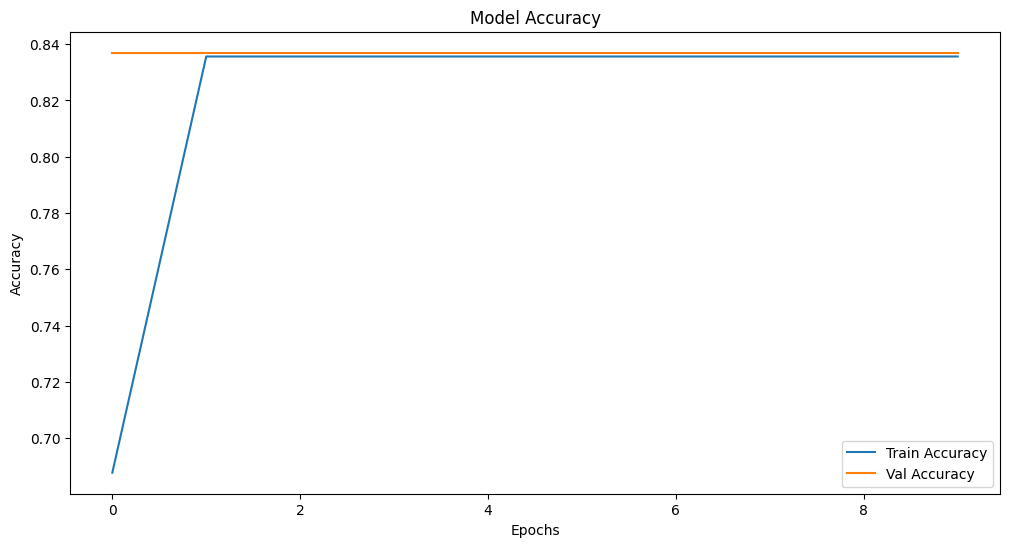

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset (assuming you've preprocessed it)
# Example of loading data (make sure to change these according to your actual data)
X_train = pd.read_csv("X_train.csv").values
X_test = pd.read_csv("X_test.csv").values
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten if needed
y_test = pd.read_csv("y_test.csv").values.ravel()

# Normalize or preprocess data as needed (example here assumes normalized data)

# Convert data to the appropriate shape (assuming time-steps for sequences)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adding an extra dimension for "channels"
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Hyperparameters
num_classes = len(np.unique(y_train))  # For multi-class classification
input_shape = X_train.shape[1:]

# One-hot encode the labels for multi-class classification
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Transformer Model
def build_transformer(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Define the Transformer Block
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Add()([inputs, x])

    # Feed Forward Layer
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation='relu')(x)

    # Output Layer
    if num_classes == 2:
        output = layers.Dense(1, activation='sigmoid')(x)  # For binary classification
    else:
        output = layers.Dense(num_classes, activation='softmax')(x)  # For multi-class classification

    model = models.Model(inputs=inputs, outputs=output)
    return model

# Build the Transformer model
model = build_transformer(input_shape=input_shape, num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy' if num_classes == 2 else 'categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
if num_classes == 2:
    y_pred = (y_pred > 0.5).astype(int)
else:
    y_pred = np.argmax(y_pred, axis=1)

# Evaluate the performance
y_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integers for evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plotting the training history (Optional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


[I 2025-04-02 05:49:40,420] A new study created in memory with name: no-name-450fe277-c3a2-415a-85d7-7ac912905227
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


[I 2025-04-02 05:50:06,264] Trial 0 finished with value: 0.03260869565217391 and parameters: {'units': 102, 'dropout': 0.2952607920725146, 'optimizer': 'rmsprop', 'learning_rate': 1.6105691406652203e-05, 'batch_size': 128}. Best is trial 0 with value: 0.03260869565217391.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


[I 2025-04-02 05:50:24,782] Trial 1 finished with value: 0.4891304347826087 and parameters: {'units': 100, 'dropout': 0.3237907180364243, 'optimizer': 'rmsprop', 'learning_rate': 0.0012183282512256974, 'batch_size': 74}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


[I 2025-04-02 05:50:38,742] Trial 2 finished with value: 0.043478260869565216 and parameters: {'units': 90, 'dropout': 0.4511373814782465, 'optimizer': 'adam', 'learning_rate': 0.0008984203674786595, 'batch_size': 128}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


[I 2025-04-02 05:50:56,236] Trial 3 finished with value: 0.2717391304347826 and parameters: {'units': 80, 'dropout': 0.31921714861054745, 'optimizer': 'adam', 'learning_rate': 0.0023533176657426613, 'batch_size': 116}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


[I 2025-04-02 05:51:08,814] Trial 4 finished with value: 0.010869565217391304 and parameters: {'units': 66, 'dropout': 0.3755812321966156, 'optimizer': 'rmsprop', 'learning_rate': 2.2773987955587386e-05, 'batch_size': 78}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


[I 2025-04-02 05:51:22,166] Trial 5 finished with value: 0.3804347826086957 and parameters: {'units': 55, 'dropout': 0.38320773510560935, 'optimizer': 'rmsprop', 'learning_rate': 0.009034271223711794, 'batch_size': 32}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


[I 2025-04-02 05:51:38,099] Trial 6 finished with value: 0.4782608695652174 and parameters: {'units': 67, 'dropout': 0.2891471818231375, 'optimizer': 'adam', 'learning_rate': 0.0001303972730217975, 'batch_size': 45}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


[I 2025-04-02 05:52:00,627] Trial 7 finished with value: 0.20652173913043478 and parameters: {'units': 128, 'dropout': 0.2929473377705143, 'optimizer': 'adam', 'learning_rate': 4.084063626080511e-05, 'batch_size': 118}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step


[I 2025-04-02 05:52:16,258] Trial 8 finished with value: 0.17391304347826086 and parameters: {'units': 81, 'dropout': 0.28845937119018006, 'optimizer': 'rmsprop', 'learning_rate': 2.321061289094196e-05, 'batch_size': 90}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


[I 2025-04-02 05:52:30,360] Trial 9 finished with value: 0.021739130434782608 and parameters: {'units': 72, 'dropout': 0.3753600547497892, 'optimizer': 'rmsprop', 'learning_rate': 2.3358029373748695e-05, 'batch_size': 89}. Best is trial 1 with value: 0.4891304347826087.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step


[I 2025-04-02 05:52:40,861] Trial 10 finished with value: 0.8260869565217391 and parameters: {'units': 38, 'dropout': 0.2071721360093238, 'optimizer': 'rmsprop', 'learning_rate': 0.00035025257449875755, 'batch_size': 64}. Best is trial 10 with value: 0.8260869565217391.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


[I 2025-04-02 05:52:50,361] Trial 11 finished with value: 0.75 and parameters: {'units': 34, 'dropout': 0.2222881188171073, 'optimizer': 'rmsprop', 'learning_rate': 0.0003563527938316651, 'batch_size': 65}. Best is trial 10 with value: 0.8260869565217391.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


[I 2025-04-02 05:52:58,633] Trial 12 finished with value: 0.05434782608695652 and parameters: {'units': 32, 'dropout': 0.20266758757721828, 'optimizer': 'rmsprop', 'learning_rate': 0.00024663498597879787, 'batch_size': 61}. Best is trial 10 with value: 0.8260869565217391.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


[I 2025-04-02 05:53:09,782] Trial 13 finished with value: 0.75 and parameters: {'units': 32, 'dropout': 0.20058828690673544, 'optimizer': 'rmsprop', 'learning_rate': 0.00015470442392690083, 'batch_size': 59}. Best is trial 10 with value: 0.8260869565217391.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


[I 2025-04-02 05:53:20,950] Trial 14 finished with value: 0.8369565217391305 and parameters: {'units': 46, 'dropout': 0.23099871577547781, 'optimizer': 'rmsprop', 'learning_rate': 0.0005018151486398157, 'batch_size': 62}. Best is trial 14 with value: 0.8369565217391305.



Best LSTM Parameters: {'units': 46, 'dropout': 0.23099871577547781, 'optimizer': 'rmsprop', 'learning_rate': 0.0005018151486398157, 'batch_size': 62}
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.2581 - loss: 1.6057 - val_accuracy: 0.0870 - val_loss: 1.6093
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3296 - loss: 1.5917 - val_accuracy: 0.0543 - val_loss: 1.6071
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3399 - loss: 1.5369 - val_accuracy: 0.0652 - val_loss: 1.6298
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3512 - loss: 1.4630 - val_accuracy: 0.0870 - val_loss: 1.6667
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3406 - loss: 1.4610 - val_accuracy: 0.1196 - val_loss: 1.7384
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3726 - loss: 1.4435 - val_accuracy: 0.1196 - val_loss: 1.7028
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3882 - loss: 1.3913 - val_accuracy: 0.1957 - val_loss: 1.5350
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3719 - loss: 1.3991 - val_accuracy: 0.2065 - val_loss: 1.

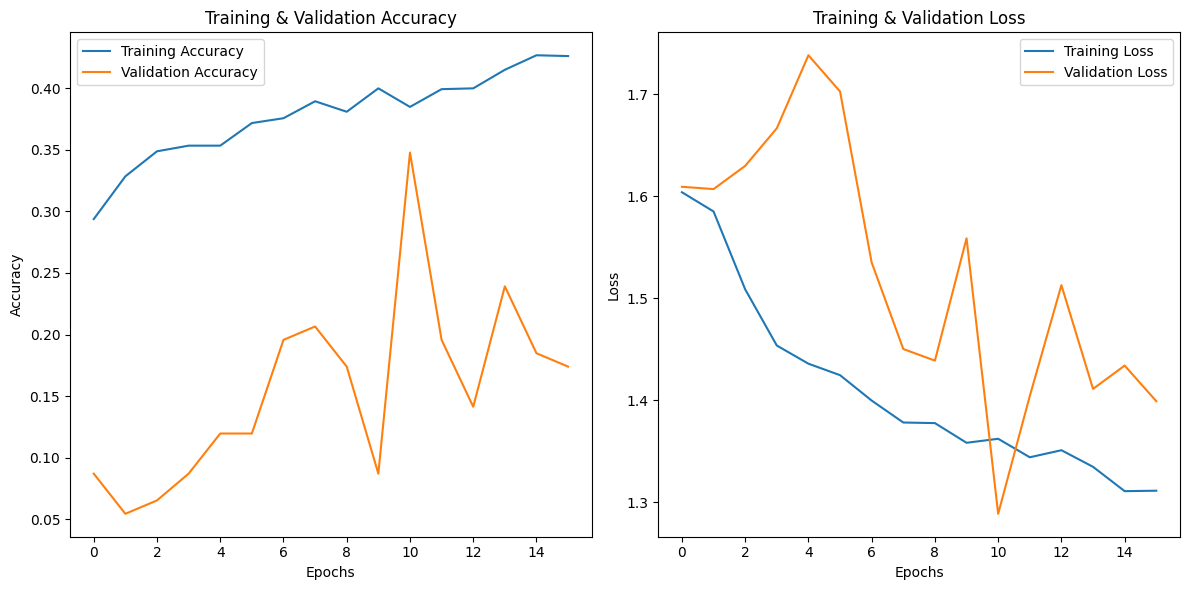

In [5]:
import pandas as pd
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (preprocessed)
X_train = pd.read_csv("X_train.csv").values  # Convert to NumPy array
X_test = pd.read_csv("X_test.csv").values
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# Apply SMOTE for class balancing (if imbalance exists)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))
if num_classes > 2:
    y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
    y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes)
else:
    y_train_categorical = y_train_encoded
    y_test_categorical = y_test_encoded

# Reshape data to fit LSTM input format (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define function to build the LSTM model
def build_lstm_model(units, dropout, optimizer_name, learning_rate):
    model = models.Sequential([
        layers.LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        layers.LSTM(units=units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
    ])

    # Convert optimizer name to actual optimizer instance with a fixed learning rate
    if optimizer_name == "adam":
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = optimizers.Adam(learning_rate=learning_rate)  # Default fallback

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Objective function for Optuna optimization
def lstm_objective(trial):
    units = trial.suggest_int("units", 32, 128)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_int("batch_size", 32, 128)

    model = build_lstm_model(units, dropout, optimizer_name, learning_rate)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    model.fit(X_train, y_train_categorical, epochs=30, batch_size=batch_size, verbose=0,
              validation_split=0.2, callbacks=[early_stopping, reduce_lr])

    y_pred = np.argmax(model.predict(X_test), axis=1) if num_classes > 2 else (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test_encoded, y_pred)
    return accuracy

# Hyperparameter tuning with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(lstm_objective, n_trials=15)

# Best parameters
best_params = study.best_params
print("\nBest LSTM Parameters:", best_params)

# Build and train the best LSTM model
best_lstm_model = build_lstm_model(best_params['units'], best_params['dropout'],
                                   best_params['optimizer'], best_params['learning_rate'])

history = best_lstm_model.fit(X_train, y_train_categorical, epochs=30, batch_size=best_params["batch_size"],
                              validation_data=(X_test, y_test_categorical),
                              callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluate the final LSTM model
y_pred_prob = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) if num_classes > 2 else (y_pred_prob > 0.5).astype("int32")

if num_classes > 2:
    roc_auc = roc_auc_score(y_test_encoded, y_pred_prob, multi_class="ovr")
else:
    roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)

lstm_results = {
    "Accuracy": accuracy_score(y_test_encoded, y_pred),
    "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
    "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
    "F1 Score": f1_score(y_test_encoded, y_pred, average='weighted'),
    "ROC-AUC": roc_auc
}

print("\nLSTM Model Results:")
print(lstm_results)

# Plot training accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)          │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 25, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,021 (586.02 KB)

 Trainable params: 150,021 (586.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.3308 - loss: 1.6963 - val_accuracy: 0.1304 - val_loss: 1.5989
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.2400 - loss: 1.7094 - val_accuracy: 0.0652 - val_loss: 1.6176
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.0997 - loss: 1.7235 - val_accuracy: 0.0761 - val_loss: 1.6223
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.1420 - loss: 1.6754 - val_accuracy: 0.2065 - val_loss: 1.6172
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.1843 - loss: 1.4512 - val_accuracy: 0.3587 - val_loss: 1.5981
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.3128 - loss: 1.4156 - val_accuracy: 0.4565 - val_loss: 1.5760
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.3194 - loss: 1.6988 - val_accuracy: 0.4565 - val_loss: 1.5729
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.3346 - loss: 1.5095 - val_accuracy: 0.4891 - v

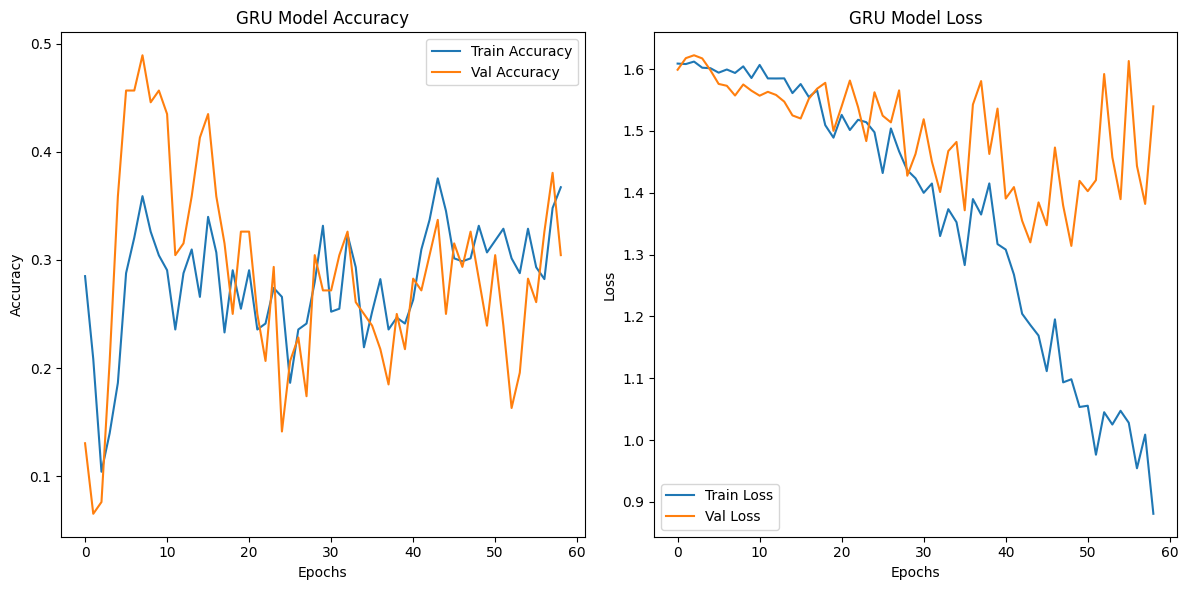

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load your dataset
try:
    X_train = pd.read_csv("X_train.csv").values
    X_test = pd.read_csv("X_test.csv").values
    y_train = pd.read_csv("y_train.csv").values.ravel()
    y_test = pd.read_csv("y_test.csv").values.ravel()
except FileNotFoundError:
    print("Error: One or more data files not found.")
    exit()

# Reshape data for RNNs/CNNs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Determine number of classes and encode labels
num_classes = len(np.unique(y_train))
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

if num_classes > 2:
    y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
    y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)
    loss_function = 'categorical_crossentropy'
else:
    y_train_categorical = y_train_encoded
    y_test_categorical = y_test_encoded
    loss_function = 'binary_crossentropy'

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))

# Build the GRU model
def build_gru_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.GRU(128, activation='relu', return_sequences=True)(inputs)
    x = layers.GRU(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    if num_classes > 2:
        outputs = layers.Dense(num_classes, activation='softmax')(x)
    else:
        outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

gru_model = build_gru_model(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

# Compile the GRU model
gru_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
gru_model.summary()

# Train the GRU model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_gru = gru_model.fit(
    X_train, y_train_categorical,
    epochs=100, batch_size=64,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluate the GRU model
y_pred_gru_prob = gru_model.predict(X_test)
if num_classes > 2:
    y_pred_gru = np.argmax(y_pred_gru_prob, axis=1)
else:
    y_pred_gru = (y_pred_gru_prob > 0.5).astype(int)

# Evaluate performance
if num_classes > 2:
    y_test_plain = y_test_encoded
else:
    y_test_plain = y_test_encoded

accuracy_gru = accuracy_score(y_test_plain, y_pred_gru)
precision_gru = precision_score(y_test_plain, y_pred_gru, average='weighted', zero_division=0)
recall_gru = recall_score(y_test_plain, y_pred_gru, average='weighted', zero_division=0)
f1_gru = f1_score(y_test_plain, y_pred_gru, average='weighted', zero_division=0)

print("\nGRU Model Results:")
print(f"Test Accuracy: {accuracy_gru * 100:.2f}%")
print(f"Test Precision: {precision_gru * 100:.2f}%")
print(f"Test Recall: {recall_gru * 100:.2f}%")
print(f"Test F1 Score: {f1_gru * 100:.2f}%")

# Plotting training history (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Val Accuracy')
plt.title("GRU Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title("GRU Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)          │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 25, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 25, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 12, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,749 (405.27 KB)

 Trainable params: 103,749 (405.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.2884 - loss: 1.5328 - val_accuracy: 0.0543 - val_loss: 1.6265
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0701 - loss: 1.6528 - val_accuracy: 0.0543 - val_loss: 1.6170
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1187 - loss: 1.7643 - val_accuracy: 0.0761 - val_loss: 1.6031
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1283 - loss: 1.8064 - val_accuracy: 0.0652 - val_loss: 1.6090
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1455 - loss: 1.5237 - val_accuracy: 0.0652 - val_loss: 1.5945
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1764 - loss: 1.4005 - val_accuracy: 0.0543 - val_loss: 1.5996
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1780 - loss: 1.4843 - val_accuracy: 0.0435 - val_loss: 1.6100
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1649 - loss: 1.3882 - val_accuracy: 0.0652 - val_loss

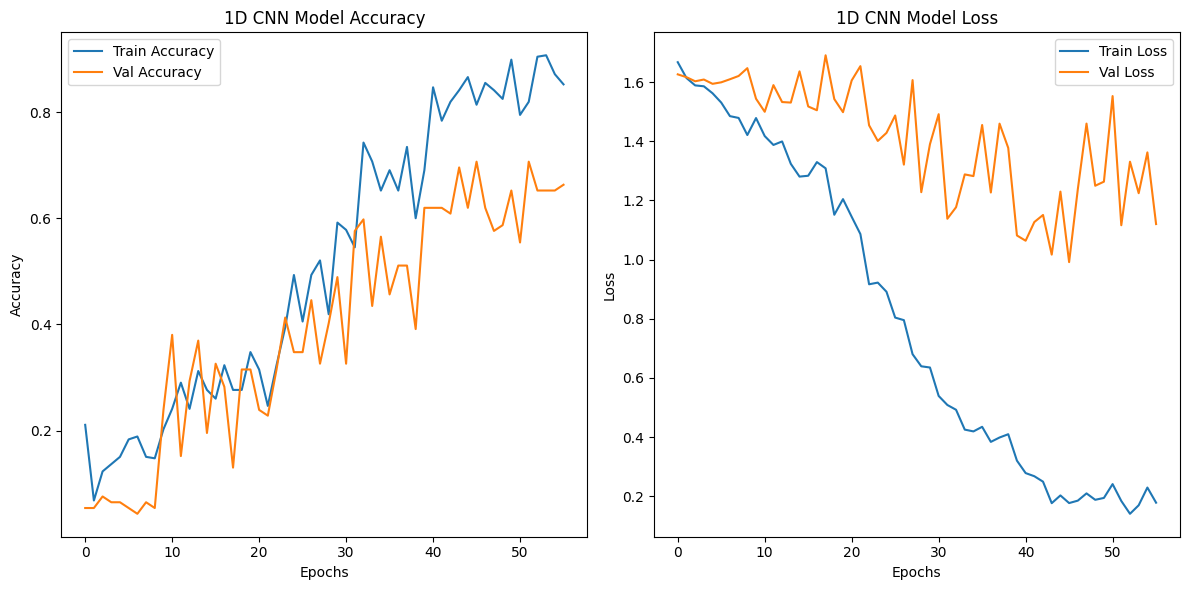

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load your dataset (same loading as GRU example)
try:
    X_train = pd.read_csv("X_train.csv").values
    X_test = pd.read_csv("X_test.csv").values
    y_train = pd.read_csv("y_train.csv").values.ravel()
    y_test = pd.read_csv("y_test.csv").values.ravel()
except FileNotFoundError:
    print("Error: One or more data files not found.")
    exit()

# Reshape data for CNN (same reshaping as GRU example)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Determine number of classes and encode labels (same encoding as GRU example)
num_classes = len(np.unique(y_train))
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

if num_classes > 2:
    y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
    y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)
    loss_function = 'categorical_crossentropy'
else:
    y_train_categorical = y_train_encoded
    y_test_categorical = y_test_encoded
    loss_function = 'binary_crossentropy'

# Compute class weights (same as GRU example)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))

# Build the 1D CNN model
def build_cnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='causal')(inputs)
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='causal', dilation_rate=2)(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='causal')(x)
    x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='causal', dilation_rate=2)(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    if num_classes > 2:
        outputs = layers.Dense(num_classes, activation='softmax')(x)
    else:
        outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

cnn_model = build_cnn_model(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

# Compile the 1D CNN model
cnn_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
cnn_model.summary()

# Train the 1D CNN model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_cnn = cnn_model.fit(
    X_train, y_train_categorical,
    epochs=100, batch_size=64,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluate the 1D CNN model
y_pred_cnn_prob = cnn_model.predict(X_test)
if num_classes > 2:
    y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)
else:
    y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)

# Evaluate performance
if num_classes > 2:
    y_test_plain = y_test_encoded
else:
    y_test_plain = y_test_encoded

accuracy_cnn = accuracy_score(y_test_plain, y_pred_cnn)
precision_cnn = precision_score(y_test_plain, y_pred_cnn, average='weighted', zero_division=0)
recall_cnn = recall_score(y_test_plain, y_pred_cnn, average='weighted', zero_division=0)
f1_cnn = f1_score(y_test_plain, y_pred_cnn, average='weighted', zero_division=0)

print("\n1D CNN Model Results:")
print(f"Test Accuracy: {accuracy_cnn * 100:.2f}%")
print(f"Test Precision: {precision_cnn * 100:.2f}%")
print(f"Test Recall: {recall_cnn * 100:.2f}%")
print(f"Test F1 Score: {f1_cnn * 100:.2f}%")

# Plotting training history (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title("1D CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title("1D CNN Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Transformer Esp32
# New section

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4318 - loss: 1.5845 - val_accuracy: 0.8370 - val_loss: 1.5047
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8629 - loss: 1.4837 - val_accuracy: 0.8370 - val_loss: 1.3736
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8446 - loss: 1.3458 - val_accuracy: 0.8370 - val_loss: 1.1933
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8466 - loss: 1.1561 - val_accuracy: 0.8370 - val_loss: 0.9828
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8453 - loss: 0.9570 - val_accuracy: 0.8370 - val_loss: 0.7930
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8410 - loss: 0.7819 - val_accuracy: 0.8370 - val_loss: 0.6857
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8333 - loss: 0.7028 - val_accuracy: 0.8370 - val_loss: 0.6616
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8479 - loss: 0.6612 - val_accuracy: 0.8370 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


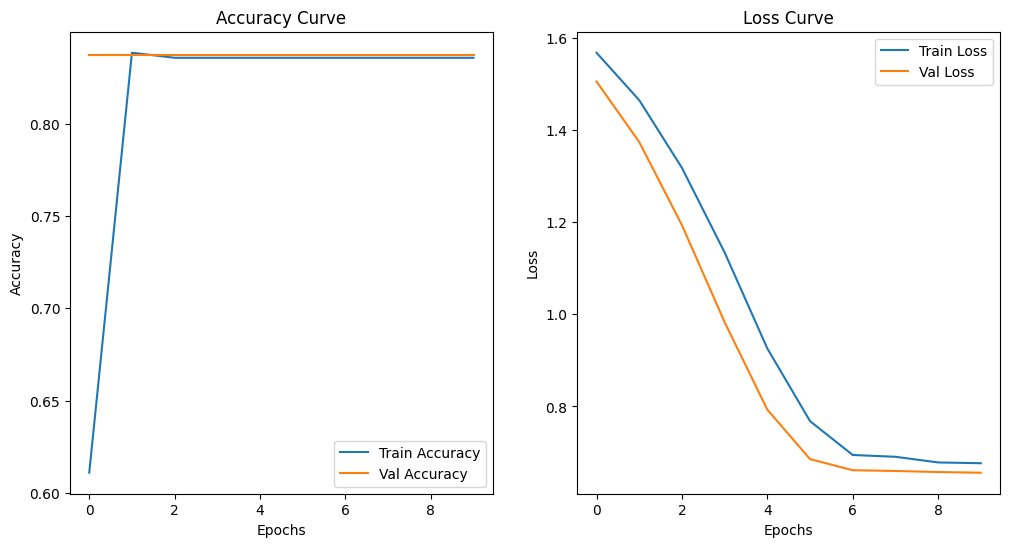

Saved artifact at '/tmp/tmp42w36jjx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25, 1), dtype=tf.float32, name='keras_tensor_252')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  134564040796560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040795216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040793872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040795792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040795024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040789840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040795984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040790992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564040794832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564036865360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134564036865552:

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
X_train = pd.read_csv("X_train.csv").values
X_test = pd.read_csv("X_test.csv").values
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# Normalize data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define classes
num_classes = len(np.unique(y_train))
input_shape = X_train.shape[1:]

# One-hot encoding
if num_classes > 2:
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

def build_transformer(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Add()([inputs, x])
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(x)
    return models.Model(inputs=inputs, outputs=output)

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

for train_idx, val_idx in skf.split(X_train, np.argmax(y_train, axis=1) if num_classes > 2 else y_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train[train_idx], y_train[val_idx]

    model = build_transformer(input_shape, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])

    model.fit(X_t, y_t, epochs=10, batch_size=32, verbose=0)
    y_pred = model.predict(X_v)
    y_pred_labels = np.argmax(y_pred, axis=1) if num_classes > 2 else (y_pred > 0.5).astype(int)
    y_true = np.argmax(y_v, axis=1) if num_classes > 2 else y_v

    metrics['accuracy'].append(accuracy_score(y_true, y_pred_labels))
    metrics['precision'].append(precision_score(y_true, y_pred_labels, average='weighted'))
    metrics['recall'].append(recall_score(y_true, y_pred_labels, average='weighted'))
    metrics['f1'].append(f1_score(y_true, y_pred_labels, average='weighted'))
    metrics['roc_auc'].append(roc_auc_score(y_true, y_pred, multi_class='ovr') if num_classes > 2 else roc_auc_score(y_true, y_pred))

# Train final model
final_model = build_transformer(input_shape, num_classes)
final_model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
history = final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate final model
y_pred = final_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1) if num_classes > 2 else (y_pred > 0.5).astype(int)
y_true = np.argmax(y_test, axis=1) if num_classes > 2 else y_test

eval_metrics = {
    "Accuracy": accuracy_score(y_true, y_pred_labels),
    "Precision": precision_score(y_true, y_pred_labels, average='weighted'),
    "Recall": recall_score(y_true, y_pred_labels, average='weighted'),
    "F1 Score": f1_score(y_true, y_pred_labels, average='weighted'),
    "ROC-AUC": roc_auc_score(y_true, y_pred, multi_class='ovr') if num_classes > 2 else roc_auc_score(y_true, y_pred)
}
print("Final Model Evaluation:", eval_metrics)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save and convert model to TensorFlow Lite
final_model.save("transformer_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_model = converter.convert()
with open("transformer_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite format for ESP32 deployment!")
